<a href="https://colab.research.google.com/github/husnulkhotimah-husnulkhotimah/berlatih-git/blob/master/Husnul_Khotimah_One_Week_Project_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

QarirLabs Entertainment sedang dalam proses membuat TV series dengan episode yang cukup banyak. TV Series tersebut memiliki konsep banyak plot twist pada alur ceritanya dan perubahan perkembangan karakter yang sangat drastis khususnya pada pemeran utama. Menurut sutradara, aktris dengan pengalaman berakting di beragam genre film dengan rating tinggi merupakan kandidat yang paling cocok. Tim casting membutuhkan daftar berisi 5 rekomendasi aktris yang berpotensi menjadi pemeran utama yang baik pada TV Series tersebut.

Gunakan data pada database yang tertera pada link di bawah ini :
https://relational.fit.cvut.cz/dataset/IMDb

# Install Dependencies

In [ ]:
!pip3 install mysql-connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 109.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp39-cp39-linux_x86_64.whl size=247964 sha256=c282c08d03c676c7d0509256699b20c99ac0ff1ee30271b8c509aad732d17501
  Stored in directory: /root/.cache/pip/wheels/7b/14/39/5aad423666e827dfe9a1fbcd111ac17171e7c9865d570780ce
Successfully built mysql-connector


# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Predefinied Function

In [ ]:
def que(query, engine):
    df = pd.read_sql(query, engine)
    return df

# Data Collection

Dari problem statement di atas, Saya menyimpulkan bahwa Saya membutuhkan
- Data aktris
- Data genre film
- Data rating
- Metode untuk menghitung kualitas aktris sebagai pemeran utama

In [ ]:
username = 'guest'
password = 'relational'
host = 'relational.fit.cvut.cz'
database = 'imdb_ijs'

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}")

In [ ]:
# check tables
query='''
    show tables
'''

que(query, engine)

,Tables_in_imdb_ijs
0,actors
1,directors
2,directors_genres
3,movies
4,movies_directors
5,movies_genres
6,roles


In [ ]:
# print first 5 rows of each tables
query='''
    show tables
'''

tables = que(query, engine)

for i in tables.Tables_in_imdb_ijs:
  query='''
      select * from ''' + i + '''
      limit 5

  '''

  print('TABLE:', i)
  print(que(query, engine))
  print()

TABLE: actors
   id first_name           last_name gender
0   2    Michael  'babeepower' Viera      M
1   3       Eloy         'Chincheta'      M
2   4   Dieguito         'El Cigala'      M
3   5    Antonio    'El de Chipiona'      M
4   6       José        'El Francés'      M

TABLE: directors
   id first_name    last_name
0   1       Todd            1
1   2        Les  12 Poissons
2   3    Lejaren     a'Hiller
3   4       Nian            A
4   5   Khairiya    A-Mansour

TABLE: directors_genres
   director_id        genre  prob
0            2        Short   1.0
1            3        Drama   1.0
2            5  Documentary   1.0
3            6        Drama   1.0
4            6        Short   1.0

TABLE: movies
   id                                 name  year  rank
0   0                                  #28  2002   NaN
1   1  #7 Train: An Immigrant Journey, The  2000   NaN
2   2                                    $  1971   6.4
3   3                        $1,000 Reward  1913   NaN
4   4

Dari output di atas, kemungkinan tabel yang digunakan adalah :    
- actors
- roles
- movies
- movies_genres

Berdasarkan problem statement di atas, kandidat yang cocok adalah aktris yang memiliki pengalaman di berbagai genre film. Oleh karena itu, Saya ingin melihat genre film yang ada di dalam data ini terlebih dahulu.


In [ ]:
# cek genre movie pada data
query='''
    SELECT genre
    FROM movies_genres
'''

que(query, engine)

,genre
0,Documentary
1,Short
2,Comedy
3,Crime
4,Western
...,...
395114,Adventure
395115,Drama
395116,Comedy
395117,Drama


Berdasarkan hasil pencarian table genre di atas, terdapat banyak jumlah genre yang masuk ke dalam kategori penilaian.

In [ ]:
# query untuk mengambil data yang akan dianalisis
query='''
    select m.id as movie_id, m.name as movie_name, m.rank as movie_rating, mg.genre as movie_genre, ro.actor_id as actor_id, concat(ac.first_name, " ", ac.last_name) as actress_name,ac.gender as gender
    from movies m
      left join movies_genres mg on m.id = mg.movie_id
      left join roles ro on mg.movie_id = ro.movie_id
      left join actors ac on ro.actor_id = ac.id
    where ac.gender <> 'M'
'''

df = que(query, engine)
df

,movie_id,movie_name,movie_rating,movie_genre,actor_id,actress_name,gender
0,2,$,6.4,Comedy,555892,Françoise Blanc,F
1,2,$,6.4,Comedy,649263,Goldie Hawn,F
2,2,$,6.4,Comedy,685870,Kirsten Lahman,F
3,2,$,6.4,Comedy,714465,Christiane Maybach,F
4,2,$,6.4,Comedy,800931,Monica Stender,F
...,...,...,...,...,...,...,...
1267527,378614,". 19,99",6.3,Comedy,821087,Hilda van der Meulen,F
1267528,378614,". 19,99",6.3,Comedy,821219,Ine van Donk,F
1267529,378614,". 19,99",6.3,Comedy,823112,Ineke Veenhoven,F
1267530,378614,". 19,99",6.3,Comedy,825975,Lies Visschedijk,F


Dengan mempertimbangkan ketersediaan data, asumsi sementara akan dilakukan dilakukan metode scoring pada tiap aktris, jumlah film, jumlah genre dan rata-rata rating film dari setiap aktris. Maka dari itu, data diambil dari data berikut :
- actors
- movies
- movies_genres


# Data Cleaning

## Check Null Values

In [ ]:
df.isna().sum()

movie_id             0
movie_name           0
movie_rating    631187
movie_genre          0
actor_id             0
actress_name         0
gender               0
dtype: int64

Terdapat null values pada kolom movie_rating dengan jumlah yang cukup tinggi. movie_rating merupakan salah satu variabel utama dalam menentukan kualitas aktris dalam suatu film. maka dari itu, baris data dengan nulls pada kolom movie_rating akan dihapus.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,movie_id,movie_name,movie_rating,movie_genre,actor_id,actress_name,gender
0,2,$,6.4,Comedy,555892,Françoise Blanc,F
1,2,$,6.4,Comedy,649263,Goldie Hawn,F
2,2,$,6.4,Comedy,685870,Kirsten Lahman,F
3,2,$,6.4,Comedy,714465,Christiane Maybach,F
4,2,$,6.4,Comedy,800931,Monica Stender,F
...,...,...,...,...,...,...,...
1267527,378614,". 19,99",6.3,Comedy,821087,Hilda van der Meulen,F
1267528,378614,". 19,99",6.3,Comedy,821219,Ine van Donk,F
1267529,378614,". 19,99",6.3,Comedy,823112,Ineke Veenhoven,F
1267530,378614,". 19,99",6.3,Comedy,825975,Lies Visschedijk,F


## Check Irregular Values

In [ ]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636345 entries, 0 to 1267531
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movie_id      636345 non-null  int64  
 1   movie_name    636345 non-null  object 
 2   movie_rating  636345 non-null  float64
 3   movie_genre   636345 non-null  object 
 4   actor_id      636345 non-null  int64  
 5   actress_name  636345 non-null  object 
 6   gender        636345 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 38.8+ MB


Ditemukan dua ketidaksesuaian tipe data yaitu pada movie_id dan actor_id. Kolom keterangan id sebaiknya disimpan dalam tipe data string karena tidak ditujukan untuk proses kalkulasi apapun.

In [ ]:
# data type adjustment
df['movie_id'] = df['movie_id'].astype(str)
df['actor_id'] = df['actor_id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636345 entries, 0 to 1267531
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movie_id      636345 non-null  object 
 1   movie_name    636345 non-null  object 
 2   movie_rating  636345 non-null  float64
 3   movie_genre   636345 non-null  object 
 4   actor_id      636345 non-null  object 
 5   actress_name  636345 non-null  object 
 6   gender        636345 non-null  object 
dtypes: float64(1), object(6)
memory usage: 38.8+ MB


In [ ]:
df.head()

,movie_id,movie_name,movie_rating,movie_genre,actor_id,actress_name,gender
0,2,$,6.4,Comedy,555892,Françoise Blanc,F
1,2,$,6.4,Comedy,649263,Goldie Hawn,F
2,2,$,6.4,Comedy,685870,Kirsten Lahman,F
3,2,$,6.4,Comedy,714465,Christiane Maybach,F
4,2,$,6.4,Comedy,800931,Monica Stender,F


<AxesSubplot:>

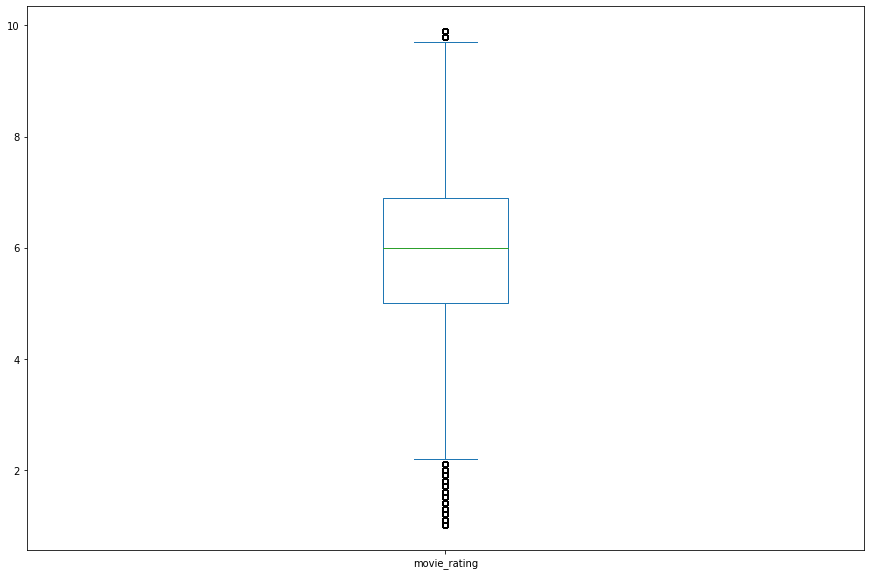

In [ ]:
# check outlier in movie_rating
df['movie_rating'].plot.box(figsize=(15,10))

Ditemukan outlier pada movie_rating. Namun tidak perlu dilakukan handling karena nilai outlier masih dalam range yang wajar pada konteks rating film pada umumnya yang bernilai 0-10.

In [ ]:
df['movie_rating'].describe()

count    636345.000000
mean          5.864755
std           1.450448
min           1.000000
25%           5.000000
50%           6.000000
75%           6.900000
max           9.900000
Name: movie_rating, dtype: float64

# Check Duplicate Values

In [ ]:
dup = df[df.duplicated(keep=False)]

dup

,movie_id,movie_name,movie_rating,movie_genre,actor_id,actress_name,gender
454801,134280,Grey Owl,5.7,Drama,760909,Rosemarie Quednau,F
454802,134280,Grey Owl,5.7,Drama,760909,Rosemarie Quednau,F
454812,134280,Grey Owl,5.7,Western,760909,Rosemarie Quednau,F
454813,134280,Grey Owl,5.7,Western,760909,Rosemarie Quednau,F
586693,174633,Kati Patang,8.3,Drama,804751,Marie-José Sulme,F
586694,174633,Kati Patang,8.3,Drama,804751,Marie-José Sulme,F
586701,174633,Kati Patang,8.3,Family,804751,Marie-José Sulme,F
586702,174633,Kati Patang,8.3,Family,804751,Marie-José Sulme,F
586709,174633,Kati Patang,8.3,Musical,804751,Marie-José Sulme,F
586710,174633,Kati Patang,8.3,Musical,804751,Marie-José Sulme,F


Ketika dilakukan checking duplicates, terdapat duplicate yang melibatkan seluruh kolom sehingga dilakukan drop duplicate data yang melibatkan semua column.

In [ ]:
# drop all columns duplicates
df.drop_duplicates(subset=['movie_id','movie_name', 'movie_rating', 'movie_genre', 'actor_id', 'actress_name', 'gender'])

,movie_id,movie_name,movie_rating,movie_genre,actor_id,actress_name,gender
0,2,$,6.4,Comedy,555892,Françoise Blanc,F
1,2,$,6.4,Comedy,649263,Goldie Hawn,F
2,2,$,6.4,Comedy,685870,Kirsten Lahman,F
3,2,$,6.4,Comedy,714465,Christiane Maybach,F
4,2,$,6.4,Comedy,800931,Monica Stender,F
...,...,...,...,...,...,...,...
1267527,378614,". 19,99",6.3,Comedy,821087,Hilda van der Meulen,F
1267528,378614,". 19,99",6.3,Comedy,821219,Ine van Donk,F
1267529,378614,". 19,99",6.3,Comedy,823112,Ineke Veenhoven,F
1267530,378614,". 19,99",6.3,Comedy,825975,Lies Visschedijk,F


In [ ]:
print('unique actor_id:', len(df['actor_id'].unique()))
print('unique actress_name:', len(df['actress_name'].unique()))

unique actor_id: 153828
unique actress_name: 153825


Jumlah unique values kolom actor_id dan actress_name seharusnya sama karena 1 id actor tidak boleh lebih dari 1 actress. Setelah dilakukan checking unique values dapat dipastikan data actress sudah valid.

In [ ]:
print('unique movie_id:', len(df['movie_id'].unique()))
print('unique movie_name:', len(df['movie_name'].unique()))

unique movie_id: 52222
unique movie_name: 50027


Jumlah unique values kolom movie_id dan movie_name seharusnya sama karena 1 id film tidak merepresentasikan lebih dari 1 film. Namun ketika dilakukan checking unique values pada kolom movie_id dan movie_name, ditemukan bahwa jumlah movie_id lebih banyak dibandingkan dengan movie_name.

In [ ]:
tmp = df[['movie_id', 'movie_name']].drop_duplicates()
tmp = tmp[tmp.duplicated(subset=['movie_name'], keep=False)]
tmp

,movie_id,movie_name
4939,1144,15 Minutes
4941,1145,15 Minutes
5707,1378,1919
5715,1379,1919
6733,1642,"20,000 Leagues Under the Sea"
...,...,...
1256818,374905,Zhong hua ying xiong
1257341,375111,Zigzag
1257355,375112,Zigzag
1259561,375898,Zorro Rides Again


Setelah ditinjau lebih dalam, ternyata terdapat beberapa movie_id yang memiliki movie_name identik.

In [ ]:
df[df['movie_name'].isin(tmp['movie_name'])]

,movie_id,movie_name,movie_rating,movie_genre,actor_id,actress_name,gender
4939,1144,15 Minutes,5.1,Comedy,605036,Elisa Donovan,F
4940,1144,15 Minutes,5.1,Short,605036,Elisa Donovan,F
4941,1145,15 Minutes,6.1,Action,529476,Christine Abrusci,F
4942,1145,15 Minutes,6.1,Action,532822,Sophia Alexis,F
4943,1145,15 Minutes,6.1,Action,575427,Kim Cattrall,F
...,...,...,...,...,...,...,...
1259564,375898,Zorro Rides Again,5.8,Western,580033,Helen Christian,F
1259565,375898,Zorro Rides Again,5.8,Western,768389,Mona Rico,F
1259566,375898,Zorro Rides Again,5.8,Western,817728,Rosa Turich,F
1259567,375899,Zorro Rides Again,6.9,Western,580033,Helen Christian,F


Hasil penelusuran lebih lanjut menunjukkan bahwa terdapat beberapa film berbeda dengan nama identik. Hal ini dapat dibuktikan dengan perbedaan rating film, genre film dan nama aktris. Selain itu ada juga film dan rating yang sama akan tetapi aktris yang memerankannya berbeda. Karena saat ini akan mencari aktris, jadi untuk film yang sama akan diabaikan selama nama aktris yang dimaksud adalah berbeda.

In [ ]:
print('unique movie_genre:', len(df['movie_genre'].unique()))

unique movie_genre: 21


Pada hasil penelusuran di atas, Saya ingin mengetahui jumlah dari genre dari data ada berapa. Setelah Saya mengetahui jumlah dari genre dan rekomendasi aktris adalah yang memiliki pengalaman di berbagai genre, maka Saya akan menjadikan jumlah ini patokan untuk penilaian rekomendasi aktris.

#Data Analysis

Dalam analisis ini, kolom id sudah tidak diperlukan lagi sehingga dilakukan drop pada kolom-kolom tersebut.

In [ ]:
drop = df.drop(columns=['movie_id', 'actor_id'])
drop

,movie_name,movie_rating,movie_genre,actress_name,gender
0,$,6.4,Comedy,Françoise Blanc,F
1,$,6.4,Comedy,Goldie Hawn,F
2,$,6.4,Comedy,Kirsten Lahman,F
3,$,6.4,Comedy,Christiane Maybach,F
4,$,6.4,Comedy,Monica Stender,F
...,...,...,...,...,...
1267527,". 19,99",6.3,Comedy,Hilda van der Meulen,F
1267528,". 19,99",6.3,Comedy,Ine van Donk,F
1267529,". 19,99",6.3,Comedy,Ineke Veenhoven,F
1267530,". 19,99",6.3,Comedy,Lies Visschedijk,F


In [ ]:
# group by actress and generate scoring features
analyze = drop.groupby('actress_name').agg(genre_count=('movie_genre', 'nunique'),
                                           movie_rating_mean=('movie_rating', 'mean'))\
                                          .reset_index()

analyze

,actress_name,genre_count,movie_rating_mean
0,'Agent' Ava Hubbard,1,5.700000
1,'Auntie' Mackay,1,7.000000
2,'Baby' Carmen De Rue,2,6.200000
3,'Chicken' Klabunde,1,6.200000
4,'Fatafat' Vijayalakshmi,6,6.740000
...,...,...,...
153820,Ülle Toming,1,8.200000
153821,Þrúður Vilhjálmsdóttir,2,5.966667
153822,Þóra Friðriksdóttir,1,7.800000
153823,Þórir Waagfjörð,2,4.600000


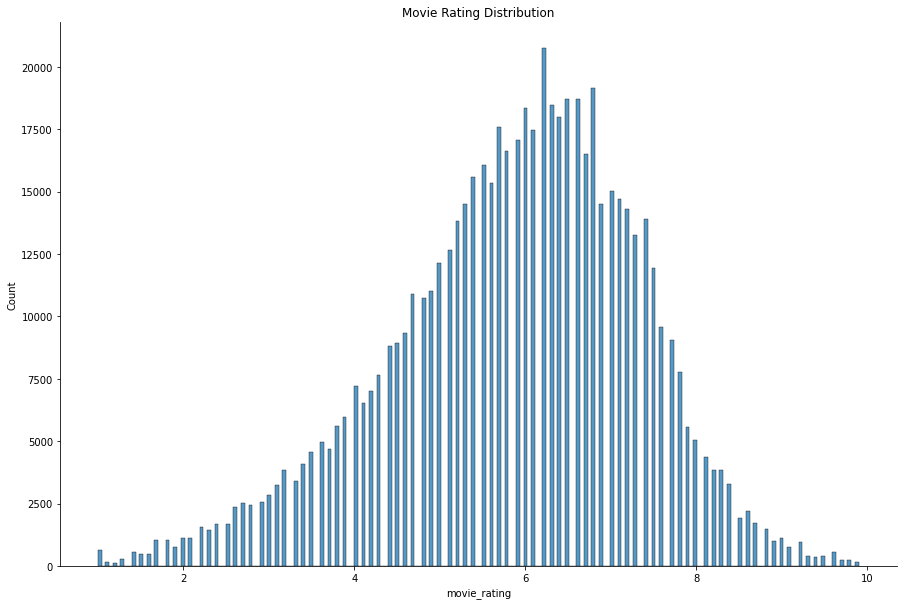

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Movie Rating Distribution')
sns.histplot(drop['movie_rating'])
sns.despine()
plt.show()

Distribusi rating film banyak terpusat pada rating 6-7 dan sangat sedikit film yang memperoleh rating 8 ke atas. Hal ini dapat menunjang asumsi analisis dalam menggunakan rating film sebagai variabel penilaian karena jumlah film dengan rating tinggi sedikit jumlahnya, Dengan begitu mudah dibedakan aktris dengan rating film tinggi dengan yang rata-rata.

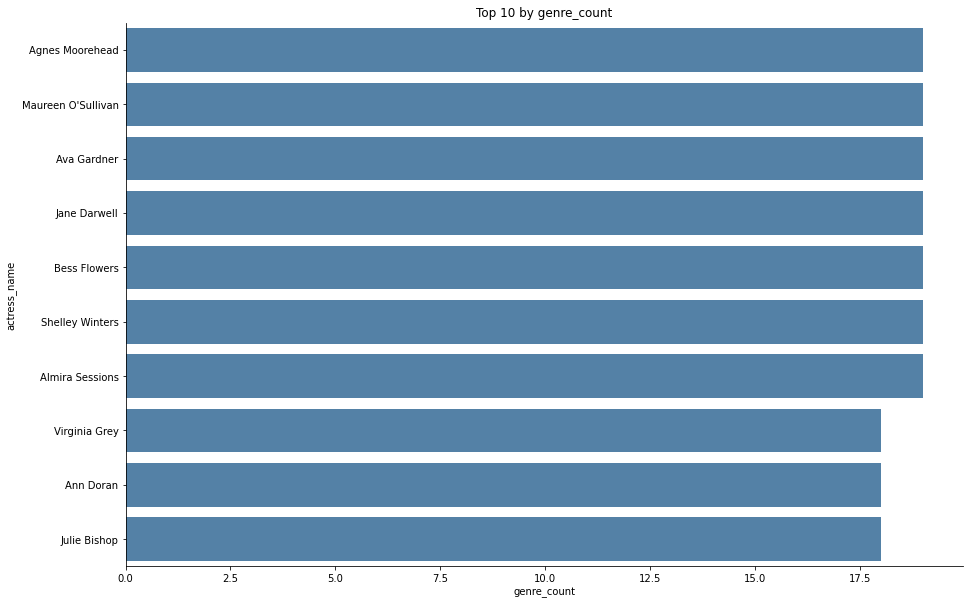

In [ ]:
high_genre_count = analyze.sort_values(by='genre_count', ascending=False).head(10)

plt.figure(figsize=(15,10))
plt.title('Top 10 by genre_count')
sns.barplot(data=high_genre_count, x='genre_count', y='actress_name',
            color='steelblue', )
sns.despine()
plt.show()

Berdasarkan hasil di atas, dapat dilihat dengan 10 aktris dengan jumlah pengalaman bermain genre terbanyak adalah 18-19.

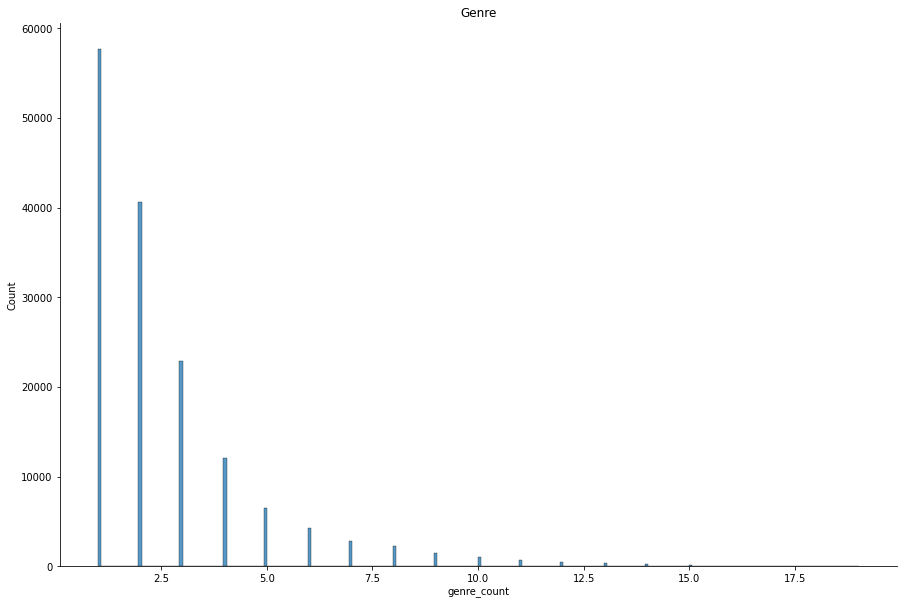

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Genre')
sns.histplot(analyze['genre_count'])
sns.despine()
plt.show()

Jika dilihat dari genre nya, sebagian besar aktris hanya bermain di 1 genre film saja.

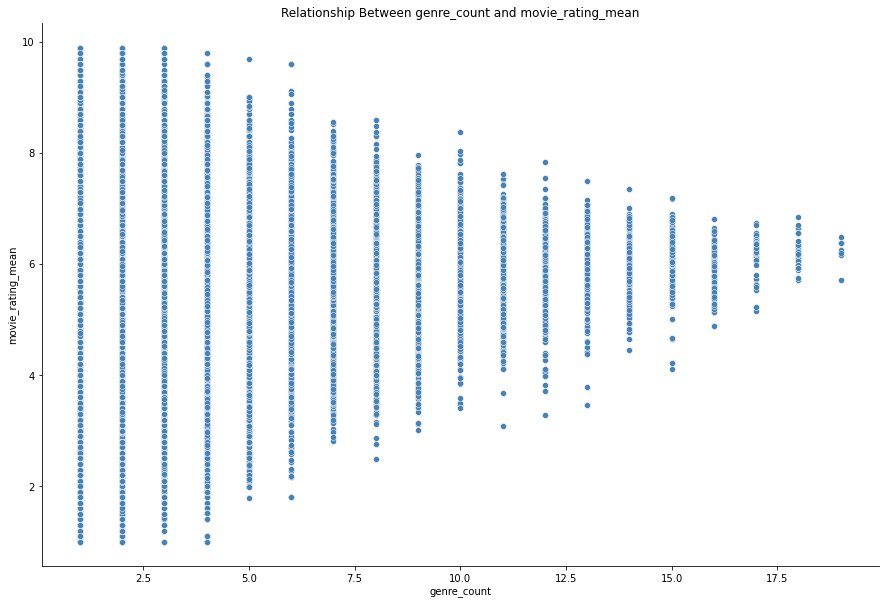

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship Between genre_count and movie_rating_mean')
sns.scatterplot(data=analyze, x='genre_count', y='movie_rating_mean',
            color='steelblue')
sns.despine()
plt.show()

Jika dilihat dari hubungan rata-rata rating film dengan jumlah film, tidak ditemukan korelasi diantara keduanya. Hal ini menggambarkan bahwa actress yang berperan di berbagai genre(movie) memiliki penilaian rating rata-rata dari penilaian rating (1-10).

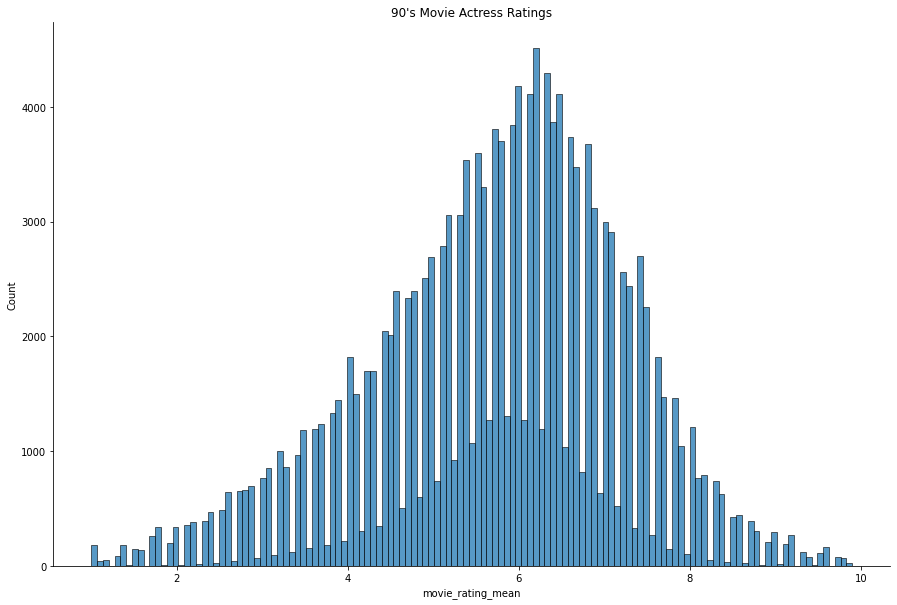

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Movie Actress Ratings')
sns.histplot(analyze['movie_rating_mean'])
sns.despine()
plt.show()

Berdasarkan hasil di atas, movie_rating_mean merepresentasikan kualitas dari akting seorang actress karena datanya didapatkan langsung dari penonton atau kritikus film.
Sebagai keputusan akhir dalam metode penilaian actrees yang akan direkomendasikan (dengan melihat problem utamanya yaitu sudah berpengalamanan akting di berbagai genre dan rating yang tinggi), maka variabel yang digunakan dalam penilaian adalah genre_count dan movie_rating_mean.

#Conclusion

Daftar rekomendasi Actress didapatkan dengan mengurutkan terlebih dahulu genre_count

In [ ]:
ca = analyze.sort_values(by='genre_count', ascending=False)
ca

,actress_name,genre_count,movie_rating_mean
961,Agnes Moorehead,19,6.169524
103494,Maureen O'Sullivan,19,6.386735
13075,Ava Gardner,19,6.197087
61728,Jane Darwell,19,6.495906
15844,Bess Flowers,19,6.371542
...,...,...,...
74388,Katarzyna Weglicka,1,8.200000
74387,Katarzyna Waszynska,1,7.000000
74378,Katarzyna Sadowska,1,5.200000
74375,Katarzyna Radochonska,1,2.300000


In [ ]:
ng

Dengan melihat data sebelumnya yang dimana banyak aktris yang memiliki pengalaman diberbagai genre paling banyak di 1-5. Dengan demikian, kita akan menormalisasikan terlebih dahulu genre_count dan movie_rating_mean sehingga nanti kita akan lakukan pembobotan nilai (final_score) untuk menentukan 5 rekomendasi aktris

In [ ]:
# normalisasi genre_count dan movie_rating_mean
ca['genre_count'] = (ca['genre_count'] - ca['genre_count'].min()) / (ca['genre_count'].max() - ca['genre_count'].min())
ca['movie_rating_mean'] = (ca['movie_rating_mean'] - ca['movie_rating_mean'].min()) / (ca['movie_rating_mean'].max() - ca['movie_rating_mean'].min())

In [ ]:
ca

,actress_name,genre_count,movie_rating_mean
961,Agnes Moorehead,1.0,0.580845
103494,Maureen O'Sullivan,1.0,0.605251
13075,Ava Gardner,1.0,0.583942
61728,Jane Darwell,1.0,0.617518
15844,Bess Flowers,1.0,0.603544
...,...,...,...
74388,Katarzyna Weglicka,0.0,0.808989
74387,Katarzyna Waszynska,0.0,0.674157
74378,Katarzyna Sadowska,0.0,0.471910
74375,Katarzyna Radochonska,0.0,0.146067


Data sudah dinormalisasi, langkah selanjutnya adalah membuat column baru final_score yang berisi pembobotan nilai. masing-masing variabel genre_count dan movie_rating_mean akan diambil nilai sebesar 0.5. Ini disesuaikan kembali dengan problem statment.

In [ ]:
ca['final_score'] = ca['genre_count']*0.5 + ca['movie_rating_mean']*0.5

In [ ]:
ca

,actress_name,genre_count,movie_rating_mean,final_score
961,Agnes Moorehead,1.0,0.580845,0.790423
103494,Maureen O'Sullivan,1.0,0.605251,0.802626
13075,Ava Gardner,1.0,0.583942,0.791971
61728,Jane Darwell,1.0,0.617518,0.808759
15844,Bess Flowers,1.0,0.603544,0.801772
...,...,...,...,...
74388,Katarzyna Weglicka,0.0,0.808989,0.404494
74387,Katarzyna Waszynska,0.0,0.674157,0.337079
74378,Katarzyna Sadowska,0.0,0.471910,0.235955
74375,Katarzyna Radochonska,0.0,0.146067,0.073034


In [ ]:
urutan = ca.sort_values(by='final_score', ascending=False)

urutan

,actress_name,genre_count,movie_rating_mean,final_score
61728,Jane Darwell,1.000000,0.617518,0.808759
103494,Maureen O'Sullivan,1.000000,0.605251,0.802626
15844,Bess Flowers,1.000000,0.603544,0.801772
99935,Marlene Dietrich,0.944444,0.656501,0.800473
3794,Almira Sessions,1.000000,0.589320,0.794660
...,...,...,...,...
59202,Isabel García,0.000000,0.000000,0.000000
26924,Christine Wells,0.000000,0.000000,0.000000
48419,Fumiko Yamaji,0.000000,0.000000,0.000000
17233,Binkie Stewart,0.000000,0.000000,0.000000


Maka berdasarkan perhitungan final_score, Didapatkan daftar rekomendasi aktris sebagai berikut :

In [ ]:
nominee = ca.sort_values(by='final_score', ascending=False).iloc[:5,0]

print('Actress Recommendation:')
for i in nominee:
  print('-',i)

print()

Actress Recommendation:
- Jane Darwell
- Maureen O'Sullivan
- Bess Flowers
- Marlene Dietrich
- Almira Sessions

